<a href="https://colab.research.google.com/github/barkabi/ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 01: due 2024/03/25 23:59

### - Tutorial: https://www.kaggle.com/prashant111/svm-classifier-tutorial

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [10]:
# Import necessary modules
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
seed = 20240325

### 1. Kernel function and hyper paramters of support vector machine. (30%)
#### Please make the scatter plots with data, and visualize the decision boundary and positive and negative hyperplanes on the following questions.

##### Here is the figure example:
![train_ex.png](attachment:03361a89-87bb-4b2c-99c9-a902ccc1d23f.png)

##### 1-1. Please use the __**svc**__ function in scikit learn module to compare the impact of the kernel function on the given two data below. Try at least ***linear, poly & rbf*** kernel functions and set hyper parameters ***C, degree*** and ***gamma*** as default. (15%)

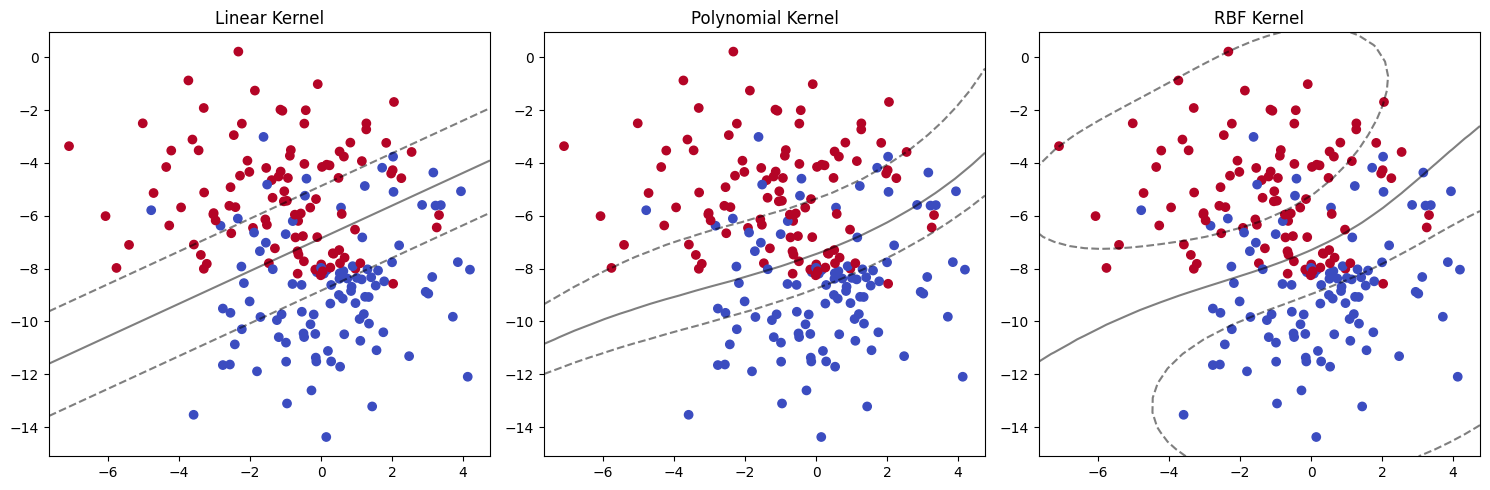

In [11]:


# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=2, random_state=seed, cluster_std=2)

# Fit SVM models with different kernel functions
svm_linear = SVC(kernel='linear').fit(X, y)
svm_poly = SVC(kernel='poly').fit(X, y)
svm_rbf = SVC().fit(X, y)

# Plot decision boundaries
def plot_svc_decision_function(model, ax=None, mode='train'):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)

    xy = np.vstack([X.ravel(), Y.ravel()]).T

    P = model.decision_function(xy).reshape(X.shape)

    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Linear Kernel
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
axs[0].set_title('Linear Kernel')
plot_svc_decision_function(svm_linear, axs[0])

# Polynomial Kernel
axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
axs[1].set_title('Polynomial Kernel')
plot_svc_decision_function(svm_poly, axs[1])

# RBF Kernel
axs[2].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
axs[2].set_title('RBF Kernel')
plot_svc_decision_function(svm_rbf, axs[2])

plt.tight_layout()
plt.show()


In [12]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=seed)

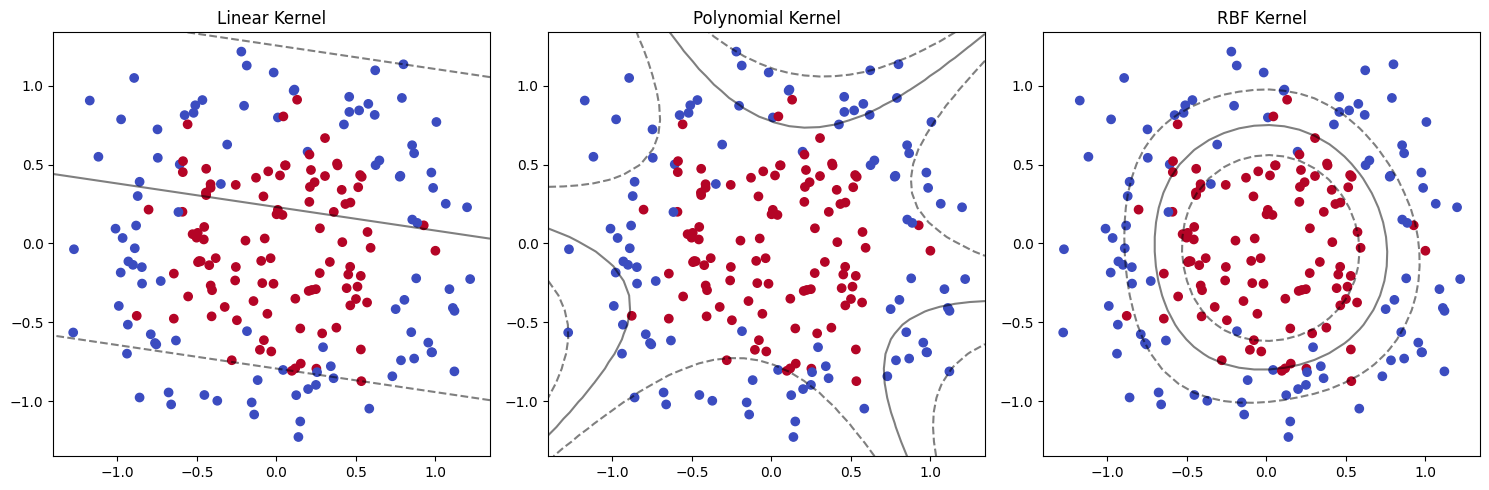

In [13]:
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=seed)

# Fit SVM models with different kernel functions
svm_linear = SVC(kernel='linear').fit(X, y)
svm_poly = SVC(kernel='poly').fit(X, y)
svm_rbf = SVC().fit(X, y)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Linear Kernel
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
axs[0].set_title('Linear Kernel')
plot_svc_decision_function(svm_linear, axs[0])

# Polynomial Kernel
axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
axs[1].set_title('Polynomial Kernel')
plot_svc_decision_function(svm_poly, axs[1])

# RBF Kernel
axs[2].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
axs[2].set_title('RBF Kernel')
plot_svc_decision_function(svm_rbf, axs[2])

plt.tight_layout()
plt.show()



##### 1-2. Please use the __**svc**__ with ***linear*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***C*** on the given data below. Try ***C=0.1 & 10000*** at least, and you can try more values of ***C*** to prove your observation. (5%)

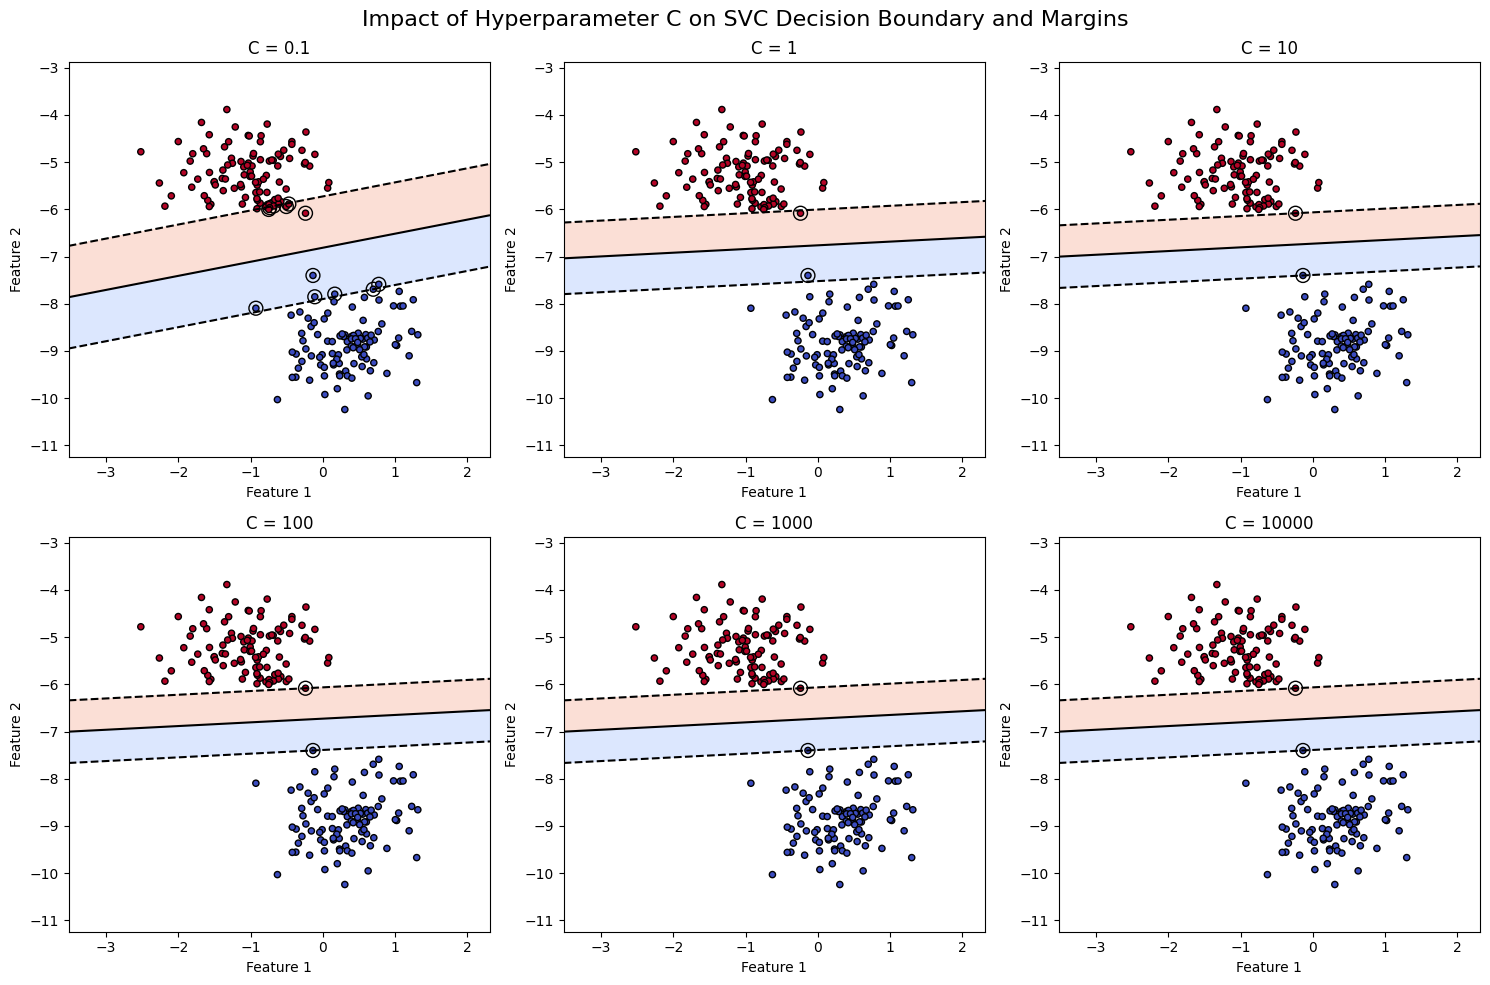

In [14]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=0.5)


# Define the values of C to try
C_values = [0.1, 1, 10, 100, 1000, 10000]

# Plotting the decision boundaries with margins for different C values
plt.figure(figsize=(15, 10))

for i, C in enumerate(C_values, 1):
    # Create SVC model
    svc_model = SVC(kernel='linear', C=C, random_state=seed)

    # Train the model
    svc_model.fit(X, y)

    # Plot decision boundary and margins
    plt.subplot(2, 3, i)
    plt.title(f'C = {C}')
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
    Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, cmap=plt.cm.coolwarm)

    # Plot margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.suptitle('Impact of Hyperparameter C on SVC Decision Boundary and Margins', fontsize=16)
plt.tight_layout()
plt.show()

##### 1-3. Please use the __**svc**__ with ***poly*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***degree*** on the given data below. Try ***degree=3 & 20*** at least, and you can try more values of ***degree*** to prove your observation. (5%)

In [15]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed)

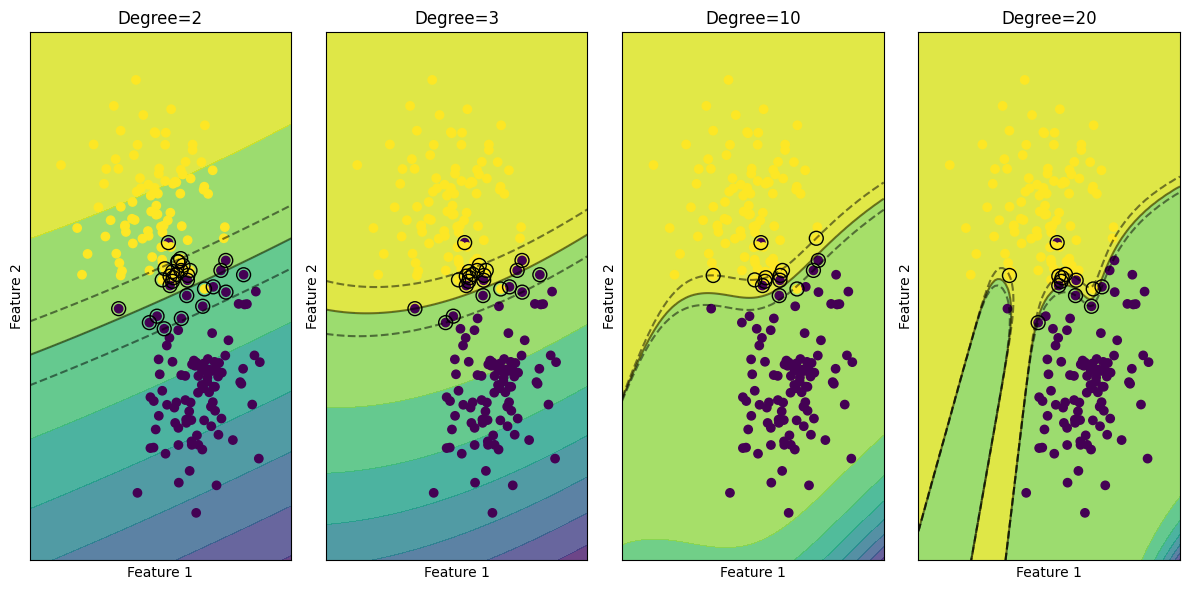

In [16]:
# Define different values of the degree hyperparameter
degrees = [2, 3, 10, 20]

# Train SVM models with polynomial kernels using different degrees
models = []
for degree in degrees:
    model = SVC(kernel='poly', degree=degree)
    model.fit(X, y)
    models.append(model)

# Plot decision boundaries and margins for each model
plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.subplot(1, len(models), i + 1)
    plt.title(f'Degree={degrees[i]}')

    # Plot decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot support vectors and margin
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xticks(())
    plt.yticks(())
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()

##### 1-4. Please use the __**svc**__ with ***rbf*** kernel in scikit-learn module, and compare the impact of the hyper parameter ***gamma*** on the given data below. Try ***gamma=1 & 15*** at least, and you can try more values of ***gamma*** to prove your observation. (5%)

In [17]:
# Do not change the data
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=seed)

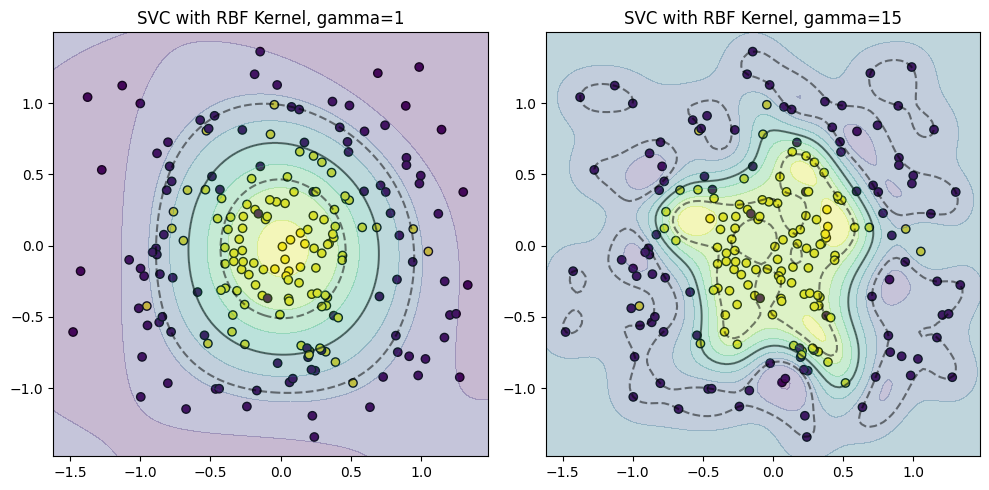

In [18]:
# Define different values of gamma to compare
gamma_values = [1, 15]  # Add more values as needed

# Create subplots to compare the decision boundaries
fig, axes = plt.subplots(1, len(gamma_values), figsize=(10, 5))

for i, gamma in enumerate(gamma_values):
    # Train SVC with RBF kernel using different gamma values
    svc = SVC(kernel='rbf', gamma=gamma)
    svc.fit(X, y)

    # Plot decision boundary
    ax = axes[i] if len(gamma_values) > 1 else axes
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    ax.set_title(f'SVC with RBF Kernel, gamma={gamma}')

    # Plot decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.tight_layout()
plt.show()

### 2. Model evaluation and hyper parameters searching. (30%)
#### Please make the scatter plots of data, visualize the hyperplane, support vector and margin and calculate the accuracy score on training data and testing data on the following questions.

##### Here is the figure example:
![2.png](attachment:100f6b32-8196-43f2-936b-ccda3005c61b.png)

##### 2-1 Use the ***training ratio 0.8 and 0.2*** to split the given data, and use the ***rbf*** kernel with ***gamma = "auto"***. Please discuss the impact of training ratio. (Split the data with random state 0) (10%)

In [19]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.3)

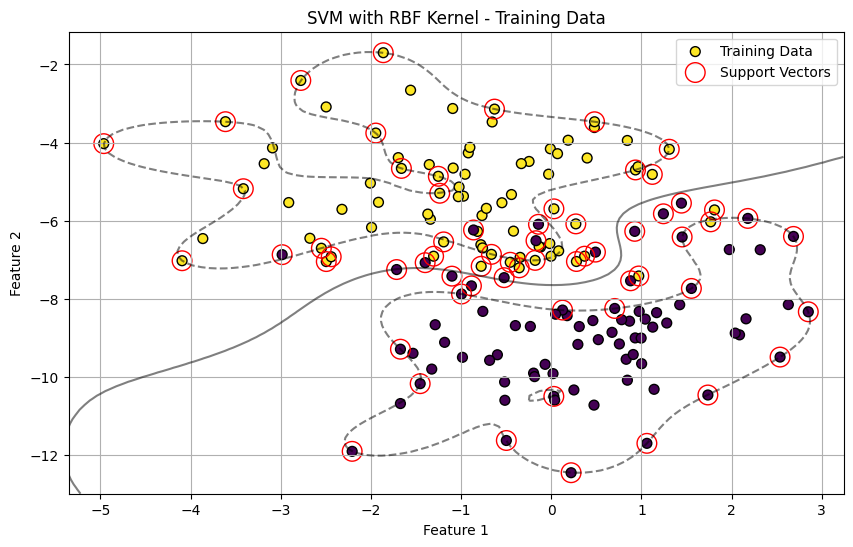

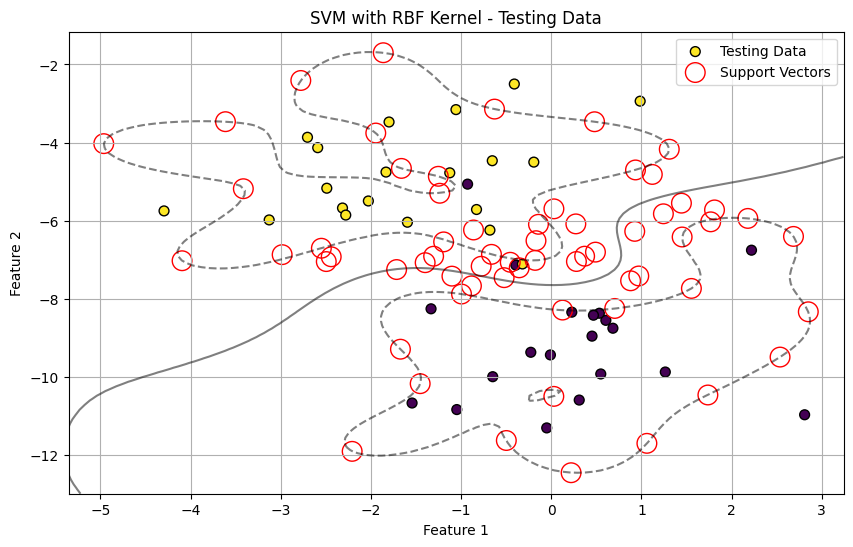

In [20]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the SVC model with RBF kernel and gamma="auto"
model = SVC(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

# Plotting training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k', label='Training Data')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='r', label='Support Vectors')
plt.title('SVM with RBF Kernel - Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.legend()
plt.grid(True)
plt.show()

# Plotting testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=50, edgecolors='k', label='Testing Data')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='r', label='Support Vectors')
plt.title('SVM with RBF Kernel - Testing Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.legend()
plt.grid(True)
plt.show()



##### 2-2 Split the given data with ***training ratio 0.8***, and use the ***rbf*** kernel with different values of ***gamma = 1 and 10***. Please discuss the impact of gamma. (Split the data with random state 0) (10%)

In [21]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

Gamma = 1:
Training Accuracy: 0.93
Testing Accuracy: 0.95


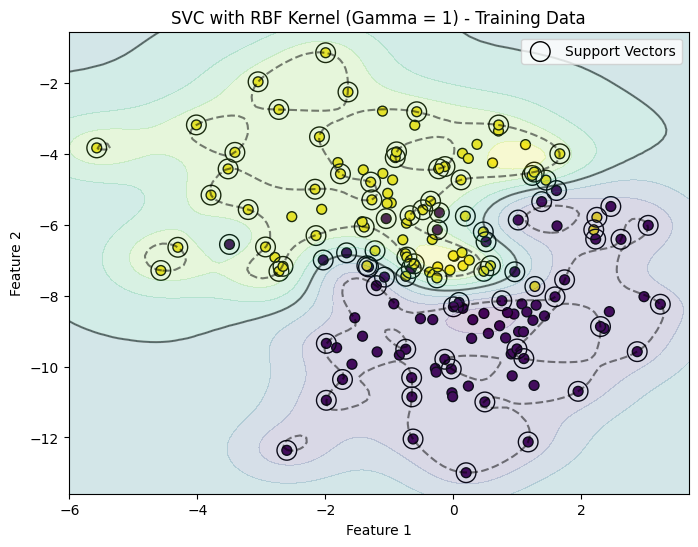

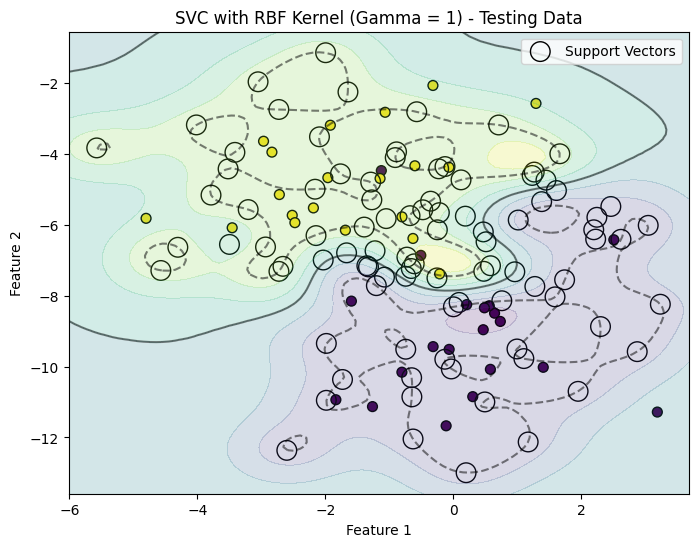

Gamma = 10:
Training Accuracy: 0.99
Testing Accuracy: 0.85


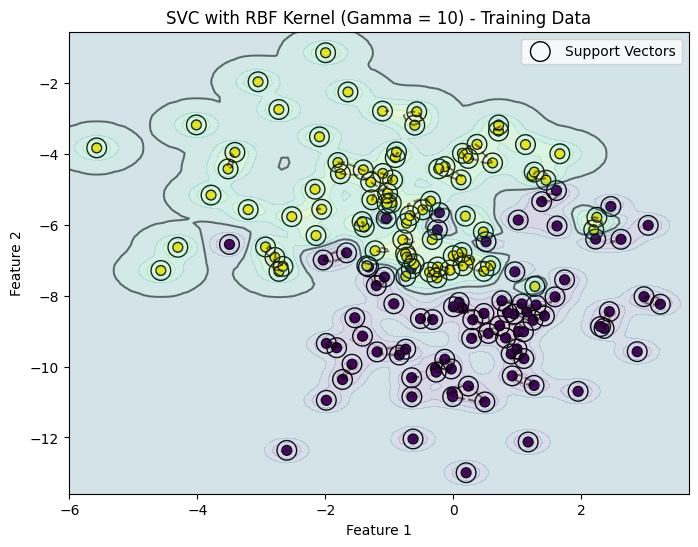

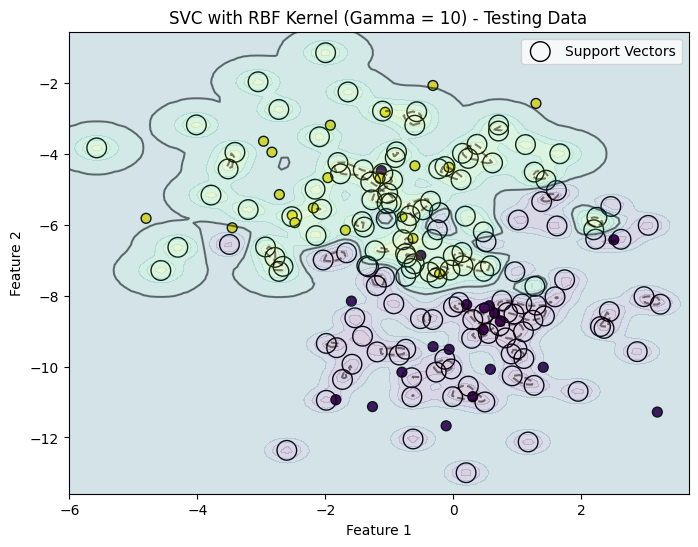

In [22]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

# Split the data with a training ratio of 0.8 and random state 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define different gamma values
gamma_values = [1, 10]

# Train and evaluate SVC models with different gamma values
for gamma in gamma_values:
    svc_model = SVC(kernel='rbf', gamma=gamma)
    svc_model.fit(X_train, y_train)

    # Make predictions for training and testing data
    y_pred_train = svc_model.predict(X_train)
    y_pred_test = svc_model.predict(X_test)

    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Print accuracy scores
    print(f"Gamma = {gamma}:")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Testing Accuracy: {test_accuracy:.2f}")

    # Plot decision boundary for training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"SVC with RBF Kernel (Gamma = {gamma}) - Training Data")

    # Plot support vectors
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='k', label='Support Vectors')

    # Create mesh grid for decision boundary
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.legend()
    plt.show()

    # Plot decision boundary for testing data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=50, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"SVC with RBF Kernel (Gamma = {gamma}) - Testing Data")

    # Plot support vectors
    plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
                s=200, facecolors='none', edgecolors='k', label='Support Vectors')

    # Create mesh grid for decision boundary
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svc_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.legend()
    plt.show()


##### 2.3 Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. Please try the parameters below to find the best parameter and plot the result and show the accuracy score. (10%)

(You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV)

| | 01 | 02 | 03 |
|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | poly |
|***degree***| 3 | 5 | - |
|***C***| 0.1 | 1 | 10|
|***gamma***| 1 | 0.1 | 0.01|

In [23]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

GPU is not available. Using CPU instead.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_para

Best Parameters: {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.905


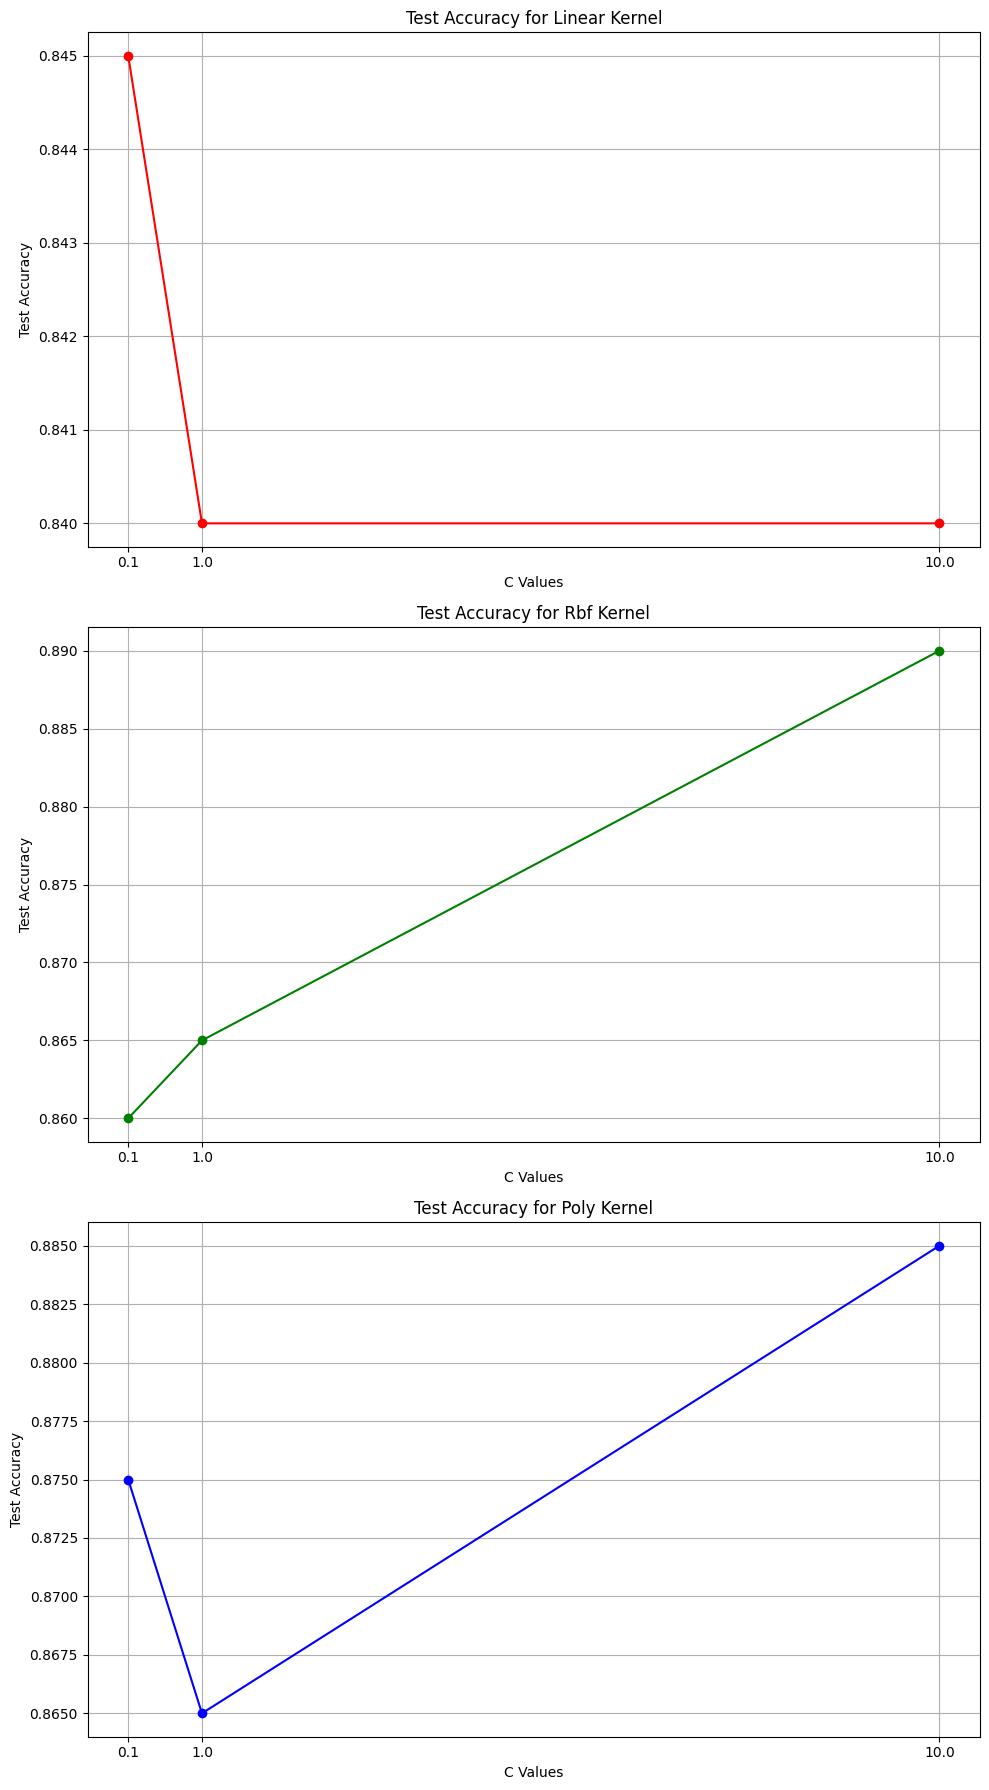

In [8]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import make_blobs
seed = 20240325
if torch.cuda.is_available():
    device = torch.cuda.get_device_name()
    print(f"GPU: {device}")
else:
    print("GPU is not available. Using CPU instead.")


# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=2, random_state=seed, cluster_std=1.5)

# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf', 'poly'],
              'degree': [3, 5, None],
              'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01]}

# Initialize GridSearchCV with SVC estimator
grid_search = GridSearchCV(SVC(), param_grid, cv=2)

# Perform GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Extract the best model
best_model = grid_search.best_estimator_

# Plotting test accuracy for 'linear', 'rbf', and 'poly' kernels with different C values and each gamma value in separate figures
C_values = [0.1, 1, 10]
gamma_values = [1, 0.1, 0.01]

fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for idx, (kernel, color) in enumerate(zip(['linear', 'rbf', 'poly'], ['red', 'green', 'blue'])):
    test_accuracies = []
    for C in C_values:
        svc_model = SVC(kernel=kernel, C=C)
        svc_model.fit(X, y)
        test_accuracy = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy').mean()
        test_accuracies.append(test_accuracy)

    # Plot test accuracy for each gamma value with the current kernel, C, and color
    axs[idx].plot(C_values, test_accuracies, marker='o', color=color)
    axs[idx].set_xlabel('C Values')
    axs[idx].set_ylabel('Test Accuracy')
    axs[idx].set_title(f'Test Accuracy for {kernel.capitalize()} Kernel')
    axs[idx].set_xticks(C_values)
    axs[idx].grid(True)

plt.tight_layout()
plt.show()


### 3. Fitting the SVM by the real data. (40%)
#### This question will fit the SVM with real raw data. Please load the file "banana_quality.csv" with pandas package. Try the technique above to reach the highest score.

**\* Please note that the 'Quality' column is the classification label, please convert it to binary labels on your own.**

**Data sources: https://www.kaggle.com/datasets/l3llff/banana**

##### 3-1 Data preprocesssing : Please draw the boxplots of each features and draw another figure with boxplots of each feaures after applying the min max scaling. (10%)

##### Here is the example of figure:

![features.png](attachment:ae5d73a9-0e23-4401-b81f-293df7f14332.png)


In [1]:
import pandas as pd
from google.colab import drive
import io
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
data = pd.read_csv('drive/MyDrive/Classroom/banana_quality.csv')
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


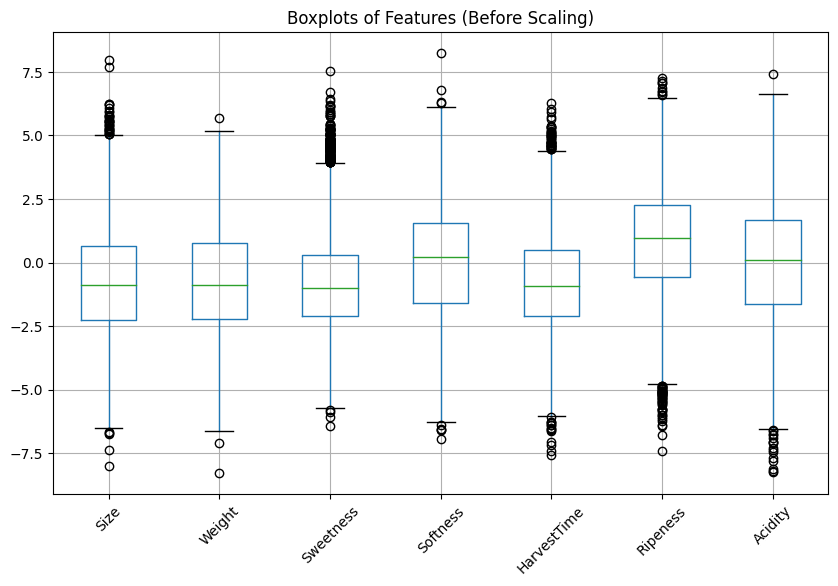

In [3]:
import matplotlib.pyplot as plt

# Display boxplots of each feature
data.boxplot(figsize=(10, 6))
plt.title("Boxplots of Features (Before Scaling)")
plt.xticks(rotation=45)
plt.show()

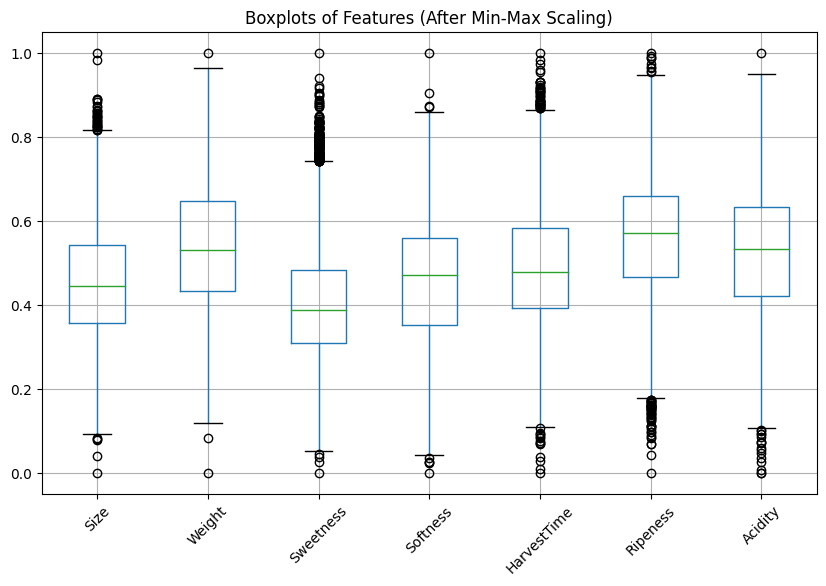

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Extract features and target
X = data.drop("Quality", axis=1)
y = data["Quality"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display boxplots of scaled features
X_scaled_df.boxplot(figsize=(10, 6))
plt.title("Boxplots of Features (After Min-Max Scaling)")
plt.xticks(rotation=45)
plt.show()

##### 3-2  Please split the data with traing ratio 0.8, and fit the SVM with your own hyper parameters (at least two sets of parameters). Also, draw the ROC curve and calculate the AUC score of the testing data to compare the performance of two models. (Note. The tutorial considers only one decision threshold, you should think about how to draw the ROC curve with defferent decision threshold) (20%)

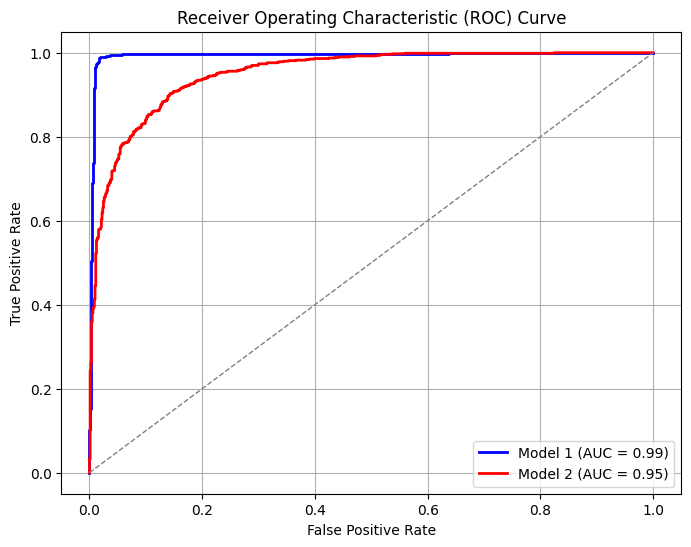

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop('Quality', axis=1)
y = data['Quality']

# Map 'Good' to 1 and 'Bad' to 0
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Split the data into training and testing sets with a training ratio of 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM models with different hyperparameters
svm_params1 = {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale'}
svm_params2 = {'C': 0.1, 'kernel': 'linear'}

# Fit SVM models
svm_model1 = SVC(**svm_params1, probability=True)
svm_model2 = SVC(**svm_params2, probability=True)

svm_model1.fit(X_train_scaled, y_train)
svm_model2.fit(X_train_scaled, y_train)

# Compute decision scores for testing data
y_score1 = svm_model1.predict_proba(X_test_scaled)[:, 1]
y_score2 = svm_model2.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score for each model
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'Model 2 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### 3-3 Compare the models from question 3-2 and choose the best parameter and corresponding model to draw the cofusion matrix of training data and testing data, and calculate the accuracy, precision, recall and F1-score. (10%)

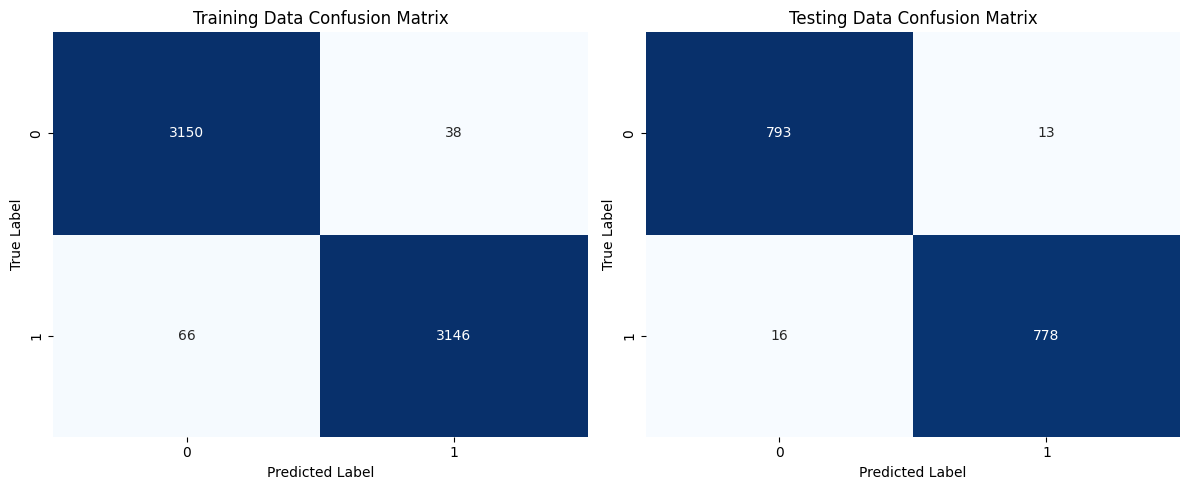

Evaluation Metrics for the Best Model:
Training Accuracy: 0.9838
Testing Accuracy: 0.9819
Training Precision: 0.9881
Testing Precision: 0.9836
Training Recall: 0.9795
Testing Recall: 0.9798
Training F1-Score: 0.9837
Testing F1-Score: 0.9817


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predictions on training data
y_train_pred1 = svm_model1.predict(X_train_scaled)
y_train_pred2 = svm_model2.predict(X_train_scaled)

# Predictions on testing data
y_test_pred1 = svm_model1.predict(X_test_scaled)
y_test_pred2 = svm_model2.predict(X_test_scaled)

# Evaluation metrics for Model 1
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
test_accuracy1 = accuracy_score(y_test, y_test_pred1)
train_precision1 = precision_score(y_train, y_train_pred1)
test_precision1 = precision_score(y_test, y_test_pred1)
train_recall1 = recall_score(y_train, y_train_pred1)
test_recall1 = recall_score(y_test, y_test_pred1)
train_f1_score1 = f1_score(y_train, y_train_pred1)
test_f1_score1 = f1_score(y_test, y_test_pred1)

# Evaluation metrics for Model 2
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
train_precision2 = precision_score(y_train, y_train_pred2)
test_precision2 = precision_score(y_test, y_test_pred2)
train_recall2 = recall_score(y_train, y_train_pred2)
test_recall2 = recall_score(y_test, y_test_pred2)
train_f1_score2 = f1_score(y_train, y_train_pred2)
test_f1_score2 = f1_score(y_test, y_test_pred2)

# Choose the best model based on evaluation metrics
best_model = svm_model1 if test_accuracy1 > test_accuracy2 else svm_model2

# Calculate confusion matrix for training and testing data using the best model
train_conf_matrix = confusion_matrix(y_train, best_model.predict(X_train_scaled))
test_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_scaled))

# Plot confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Testing Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Print evaluation metrics
print('Evaluation Metrics for the Best Model:')
print(f'Training Accuracy: {train_accuracy1:.4f}')
print(f'Testing Accuracy: {test_accuracy1:.4f}')
print(f'Training Precision: {train_precision1:.4f}')
print(f'Testing Precision: {test_precision1:.4f}')
print(f'Training Recall: {train_recall1:.4f}')
print(f'Testing Recall: {test_recall1:.4f}')
print(f'Training F1-Score: {train_f1_score1:.4f}')
print(f'Testing F1-Score: {test_f1_score1:.4f}')
